### Context

League of Legends adalah MOBA (Multiplayer Online Battle Arena) di mana dalam permainannya terdapat 2 tim (biru dan merah) yang saling berhadapan. Dalam satu laga permainan, ada 3 jalur yang dijadikan medan perang, hutan dan pemainnya terbagi jadi 5 peran. Tujuan permainan ini adalah menjatuhkan Nexus atau base musuh dan memenangkan permainan.

### Content

Diketahui dataset berisi 10 menit dari pertandingan.  Game yang dimainkan berperingkat 10k (SOLO QUEUE Player) dari ELO Diamond I hingga level Master. ELO sendiri merupakan teknik pencarian pemain dengan peringkat atau tingkat keterampilan yang sejenis. Setiap permainan yang terjadi itu unik. GameId dapat membantu kamu mengambil lebih banyak atribut dari Riot API pada kolom dataset. 

Dari data Glossary & Variables, diketahui terdapat 19 fitur pertim (total 38) yang dikumpulkan setelah 10 menit game berlangsung. Data ini termasuk pembunuhan, kematian, emas, pengalaman dan level. Di sini kamu dibebaskan untuk melakukan beberapa rekayasa fitur untuk mendapatkan lebih banyak wawasan atau insight. 

Pada data diketahui juga bahwa kolom blueWins adalah nilai target atau nilai yang akan coba diprediksi, di mana jika Nilai 1 berarti tim biru menang, sedangkan jika Nilai 0 maka sebaliknya. 

### Glossary

- Warding totem: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan. 
- Minions: Item yang dapat diletakkan pemain di peta untuk mengungkap area terdekat. Sangat berguna untuk kontrol peta/tujuan.
- Jungle minions: NPC milik NO TEAM. Mereka memberi emas dan buff saat dibunuh oleh pemain.
- Elite monsters: Monster dengan hp/damage tinggi yang memberikan bonus besar (gold/XP/stat) saat dibunuh oleh tim.
- Dragons: Monster elit yang memberikan bonus tim saat terbunuh. Naga ke-4 yang dibunuh oleh tim memberikan bonus statistik yang sangat besar. The - - 5th dragon (Elder Dragon) menawarkan keuntungan besar bagi tim.
- Herald: Monster elit yang memberikan bonus statistik saat dibunuh oleh pemain. Ini membantu untuk mendorong jalur dan menghancurkan struktur.
- Towers: Struktur yang harus Anda hancurkan untuk mencapai Nexus musuh. Mereka memberi emas.
- Level: Champion level. Mulai dari 1. Maksimal 18.

### Variables

1.	Gameid : ID RIOT unik dari game. Dapat digunakan dengan Riot Games API.
2.	Bluewins: Kolom target. 1 jika tim biru menang, 0 sebaliknya.
3.	blueWardsPlaced Jumlah totem penangkal yang ditempatkan oleh tim biru di peta
4.	blueWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim biru
5.	blueFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim biru melakukan pembunuhan pertama, 0 sebaliknya
6.	blueKills : Jumlah musuh yang dibunuh oleh tim biru
7.	blueDeaths : Jumlah kematian (tim biru)
8.	blueAssists : Jumlah assist kill (tim biru)
9.	blueEliteMonsters : Jumlah monster elit yang dibunuh oleh tim biru (Dragons and Heralds)
10.	blueDragons : Jumlah naga yang dibunuh oleh tim biru
11.	blueHeralds :  Jumlah tentara yang dibunuh oleh tim biru
12.	blueTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim biru (menara...)
13.	blueTotalGold : Tim biru total emas
14.	blueAvgLevel : Tingkat juara rata-rata tim biru
15.	blueTotalExperience : Pengalaman total tim biru
16.	blueTotalMinionsKilled : Total minion tim biru terbunuh (CS)
17.	blueTotalJungleMinionsKilled : Total monster hutan tim biru terbunuh
18.	blueGoldDiff : Perbedaan emas tim biru dibandingkan dengan tim musuh
19.	blueExperienceDiff : Tim biru mengalami perbedaan dibandingkan dengan tim musuh
20.	blueCSPerMin : CS tim biru (antek) per menit
21.	blueGoldPerMin : Emas tim biru per menit
22.	redWardsPlaced : Jumlah totem penangkal yang ditempatkan oleh tim merah di peta
23.	redWardsDestroyed : Jumlah totem penangkal musuh yang telah dihancurkan oleh tim merah
24.	redFirstBlood : Pembunuhan pertama dari permainan. 1 jika tim merah melakukan pembunuhan pertama, 0 sebaliknya
25.	redKills : Jumlah musuh yang dibunuh oleh tim merah
26.	redDeaths : Jumlah kematian (tim merah)
27.	redAssists: Jumlah assist kill (tim merah)
28.	redEliteMonsters : Jumlah monster elit yang dibunuh oleh tim merah (Dragons and Heralds)
29.	redDragons : Jumlah naga yang dibunuh oleh tim merah
30.	redHeralds: Jumlah bentara yang dibunuh oleh tim merah
31.	redTowersDestroyed : Jumlah bangunan yang dihancurkan oleh tim merah (menara)
32.	redTotalGold: Tim merah total emas
33.	redAvgLevel: Tingkat juara rata-rata tim merah
34.	redTotalExperience: Pengalaman total tim merah
35.	redTotalMinionsKilled : Total minion tim merah tewas (CS)
36.	redTotalJungleMinionsKilled : Total monster hutan tim merah terbunuh
37.	redGoldDiff : Perbedaan emas tim merah dibandingkan dengan tim musuh
38.	redExperienceDiff : Tim merah mengalami perbedaan dibandingkan dengan tim musuh
39.	redCSPerMin : CS tim merah (antek) per menit
40.	redGoldPerMin : Emas tim merah per menit

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Data
df = pd.read_csv('C:/Users/USER/Project Data Science/Case Study 03/high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
# Checking the shape of the data
df.shape

(9879, 40)

## 2. Basic EDA & Data Preprocessing

In [4]:
# Checking null values
print(df.isnull().sum())

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [5]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
#checking for quasi constants
quasi_constants = df.columns[df.apply(lambda x: x.value_counts(normalize=True).values[0] > 0.99)]
df.drop(quasi_constants, axis=1, inplace=True)

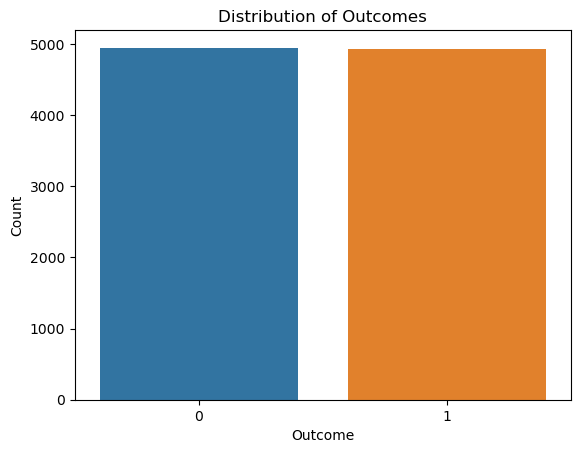

In [7]:
# Bar plot of the outcomes to see how they are distributed
sns.countplot(x='blueWins', data=df)
plt.title('Distribution of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [8]:
# Value counts data blueWins
df['blueWins'].value_counts()

blueWins
0    4949
1    4930
Name: count, dtype: int64

# Buatlah catatan dari hasil data preprocessing

1. Data terdiri dari 19 fitur dengan total 38 kolom setelah 10 menit permainan. Fitur-fitur ini mencakup informasi seperti kill, death, gold, exp, dan level.

2. Terdapat dua nilai dalam kolom blueWins, yaitu 0 dan 1, yang menunjukkan apakah tim biru menang (1) atau kalah (0).

3. Tidak ditemukan missing values dalam dataset. Oleh karena itu, tidak diperlukan langkah pengelolaan missing values.

4. Fitur-fitur yang memiliki nilai konstan lebih dari 99% dihapus karena tidak memberikan variasi informasi yang signifikan.

#### Importing required libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score, roc_curve

## 3. Data Splitting into train and test set

In [10]:
from imblearn import under_sampling, over_sampling

X = df.drop(columns=['blueWins'], axis=1)
y = df['blueWins']

X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2,random_state =42)
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)
#train , test = train_test_split(df,test_size=0.2, random_state=42)

X_train dataset:  (7888, 39)
y_train dataset:  (7888,)
X_test dataset:  (1972, 39)
y_test dataset:  (1972,)


## 4. Feature Selection and Compare Each Model

Method 1: Feature Selection using different methods and checking with different models

Feature Selection using Feature importance of Random Forest Classifier

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
sfm = SelectFromModel(rf_classifier, threshold=0.05)
sfm.fit(X_train_scaled, y_train)
X_train = sfm.transform(X_train_scaled)
X_test = sfm.transform(X_test_scaled)
selected_features = X.columns[sfm.get_support()]
print("Selected features menggunakan Feature Importance:", selected_features)
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#rf_classifier.fit(X_train_scaled, y_train)
#feature_importances = rf_classifier.feature_importances_
#feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
#feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
#top_features = feature_importance_df['Feature'][:10].tolist()
#print("Selected features menggunakan Feature Importance:", top_features)

Selected features menggunakan Feature Importance: Index(['blueTotalGold', 'blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')


Feature Selection using Recursive feature extraction (RFE)

In [13]:
lr_classifier = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr_classifier, n_features_to_select=10, step=1)
rfe.fit(X_train_scaled, y_train)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
selected_features_rfe = X.columns[rfe.get_support()]
print("Selected features menggunakan RFE:", selected_features_rfe)

Selected features menggunakan RFE: Index(['blueDragons', 'blueTotalGold', 'blueGoldDiff', 'blueExperienceDiff',
       'blueGoldPerMin', 'redDragons', 'redTotalGold', 'redGoldDiff',
       'redExperienceDiff', 'redGoldPerMin'],
      dtype='object')


## 5. Modelling and Evaluation


In [14]:
# Modeling menggunakan Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model_initial.fit(X_train,y_train)
print("Random Forest accuracy for 100 trees is :",rf_model_initial.score(X_test,y_test))

Random Forest accuracy for 100 trees is : 0.6947261663286004


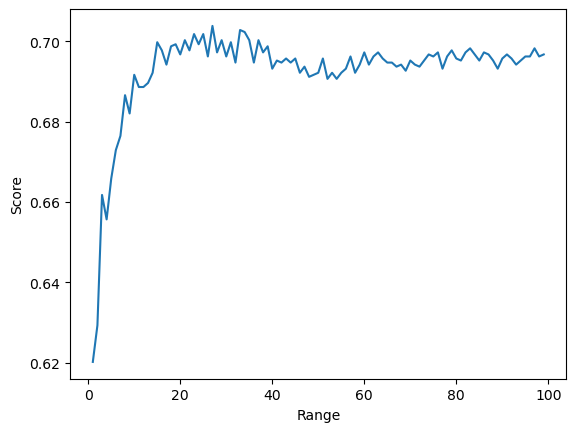

In [15]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 42) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    
plt.plot(range(1,100),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [16]:
# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

In [58]:
# Metrics Evaluation Score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy menggunakan Random Forest:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy menggunakan Random Forest: 0.7129817444219066
Confusion Matrix:
[[716 295]
 [271 690]]


In [53]:
# Modeling menggunakan RFE selected features
rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_model.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predictions menggunakan RFE selected features
y_pred_rfe = rf_classifier_rfe.predict(X_test_rfe)

In [43]:
# Metrics Evaluation Score menggunakan RFE selected features
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print("Accuracy Score menggunakan RFE:", accuracy_rfe)

Accuracy Score menggunakan RFE: 0.7114604462474645


In [45]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'LOSE', 'WIN'],va='center')
    plt.xticks([0.5,1.5], [ 'LOSE', 'WIN'],va='center')
    plt.show()

In [46]:
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [59]:
print_scores("=========Random Forest Classifier=========;",y_test, rf_model.predict(X_test_scaled))
print_scores("=========Recursive feature extraction=========;",y_test, rfe_model.predict(X_test_rfe))

=========Random Forest Classifier=========;
accuracy:  0.7129817444219066
precision:  0.700507614213198
recall:  0.7180020811654526
f1_score:  0.7130278078006709
=========Recursive feature extraction=========;
accuracy:  0.7114604462474645
precision:  0.7033195020746889
recall:  0.7055150884495317
f1_score:  0.7114709140956545


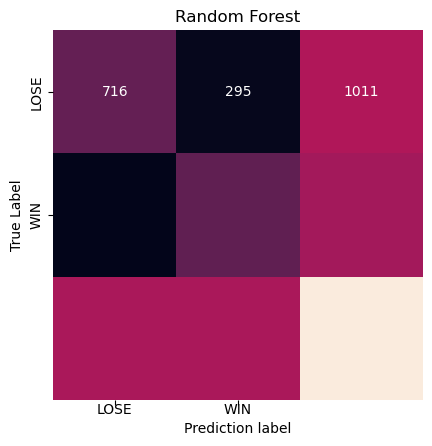

In [57]:
model_evaluation(rf_model.predict(X_test_scaled),"Random Forest")

Feature Selection menggunakan Feature importance dari Random Forest Classifier manghasilkan tingkat akurasi yang hampir sama
ketika menggunakan RFE. Feature importance mendapatkan tingkat akurasi sebesar 0.7129817444219066, sedangkan RFE 0.7114604462474645